<div style="background-color: #1c4f38; padding: 10px;">
    <h1 style="color: white">Fake News Classifier</h1>
    <hr  style="color: white">
    <h4 style="color: white">Представено от:</h4>
   <ol style="color: white; margin-bottom=70px">
      <li>Кирил Йотов
          <ul style="list-style-type: none;">
            <li>Факултетен номер: 7MI0800146</li>
            <li>Специалност: КН, бакалавър</li>
          </ul>
      </li>
      <li>Христо Жаблянов
          <ul style="list-style-type: none;">
            <li>Факултетен номер: 82158</li>
            <li>Специлност: КН, бакалавър</li>
          </ul>
    </ol>

  <h4 style="color: white">Преподавател:</h4>
    <ol style="color: white; margin-bottom=200px">
      <li>Мелания Бербатова
          <ul style="list-style-type: none;">
            <li>Факултет: ФМИ</li>
            <li>Катедра: КИ</li>
          </ul>
      </li>
    
  <h4>София, 2024</h4>
</div>

# Съдържание
- Въведение
- Библиотеки
- Алгоритми
- Данни
- Mасажиране на данните
- Резултати
- Заключение

# Въведение


Тип на проекта: 'А'

Проекта е базиран на kaggle [Fake News Classification](https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification).

# Библиотеки
- numpy
- pandas
- matplotlib
- scikit-learn
- seaborn
- wordcloud (Добре де, тази я няма в курса, но я ползвам само за визуализация)
- nltk

# Алгоритми:
- **Naive Bayes**: Базиран на условна вероятност, но предполага, че атирбутите са независими. Това го прави ефикасен, но може да не ни е много от помощ, ако създаваме нови колони, базирано на title/text.
- **Logistic Regression**: Базиран е на линейна регресия, която намира линейна функция на атрибутите. Но докато линейната регресия работи с непрекъснати стойности, логистичната е адаптирана за дискретни.
- **KNN**: Мързелив алгоритъм, който пази всички данни и predict-ва нови, като сравнява близостта им със старите.
- **Decision Tree**: Изгражда дърво, където листата са класове, вътрешните възли са тествани атирбути, а ребрата са възможни стойности на тестваните атрибути.
- **Random Forest**: Метод на ансамблово учене, където се тренират множество дървета и се ползва гласуване за predict-ване.

# Разглеждане на данните

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('./dataset/WELFake_Dataset.csv')
data.drop(data.columns[0], axis=1, inplace=True)

In [5]:
print(data.shape)
print()
print(data.info())
print()
print(data.describe())

(72134, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None

              label
count  72134.000000
mean       0.514404
std        0.499796
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000


Данните представляват 3 колони:
- title: заглавие на новината
- text: текст на новината
- label: бинарна стойност, която показва дали новината е фалшива или истинска
    - 0: Fake
    - 1: Real

In [3]:
data.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


Данните са разпределени сравнително равномерно.

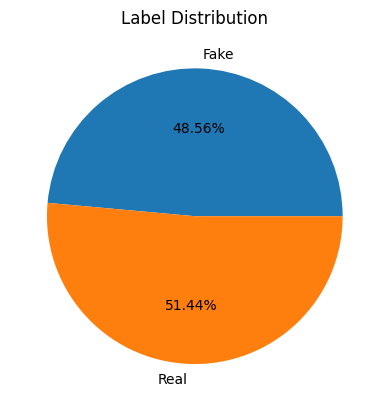

In [4]:
data.groupby('label').size().plot(kind = 'pie', autopct = '%.2f%%', labels = ['Fake', 'Real'])
plt.title('Label Distribution')
plt.show()

Новини, където и заглавието и текстът са празни, щяха да са безполезни, та е хубаво, че такива няма. Новини с липсващо заглавие или текст са малко, но виждаме, че такива има само при истинските новини.

In [69]:
fake_news = data[data['label'] == 0]
real_news = data[data['label'] == 1]
fake_news_no_title_count = len(fake_news[pd.isna(fake_news['title'])])
real_news_no_title_count = len(real_news[pd.isna(real_news['title'])])
fake_news_no_text_count = len(fake_news[pd.isna(fake_news['text'])])
real_news_no_text_count = len(real_news[pd.isna(real_news['text'])])
fake_news_nothing = len(fake_news[pd.isna(fake_news['title']) & pd.isna(fake_news['text'])])
real_news_nothing = len(real_news[pd.isna(real_news['title']) & pd.isna(real_news['text'])])
count = len(data)

print('Total entries: %d' % count)
print('Fake news without titles: %d, %.2f%%' % (fake_news_no_title_count, fake_news_no_title_count / count))
print('Real news without titles: %d, %.2f%%' % (real_news_no_title_count, real_news_no_title_count / count))
print('Fake news without texts: %d, %.2f%%' % (fake_news_no_text_count, fake_news_no_text_count / count))
print('Real news without texts: %d, %.2f%%' % (real_news_no_text_count, real_news_no_text_count / count))
print('Fake news without titles and texts: %d, %.2f%%' % (fake_news_nothing, fake_news_nothing / count))
print('Real news without titles and texts: %d, %.2f%%' % (real_news_nothing, real_news_nothing / count))

Total entries: 72134
Fake news without titles: 0, 0.00%
Real news without titles: 558, 0.01%
Fake news without texts: 0, 0.00%
Real news without texts: 39, 0.00%
Fake news without titles and texts: 0, 0.00%
Real news without titles and texts: 0, 0.00%


In [70]:
print(len(data[data['title'] == '']))
print(len(data[data['text'] == '']))

0
0


Виждаме, че новините с празни заглавия са доста малко, а още повече тези с празни текстове. Хубаво е, че няма новини, където и двете колони са празни, защото те щяха да са безполезни.

# Зависимости

## Брой думи

In [71]:
counted = data.copy()
counted['title'] = counted['title'].fillna('')
counted['text'] = counted['text'].fillna('')
counted['title-word-count'] = counted['title'].apply(lambda x: len(x.split()))
counted['text-word-count'] = counted['text'].apply(lambda x: len(x.split()))
counted.describe()

,label,title-word-count,text-word-count
count,72134.000000,72134.000000,72134.000000
mean,0.514404,12.173316,540.550933
std,0.499796,4.255615,625.399748
min,0.000000,0.000000,0.000000
25%,0.000000,9.000000,227.000000
50%,1.000000,12.000000,398.000000
75%,1.000000,14.000000,667.000000
max,1.000000,72.000000,24234.000000


Подсигуряваме се, че празни низове не са се промъкнали вместо NA.

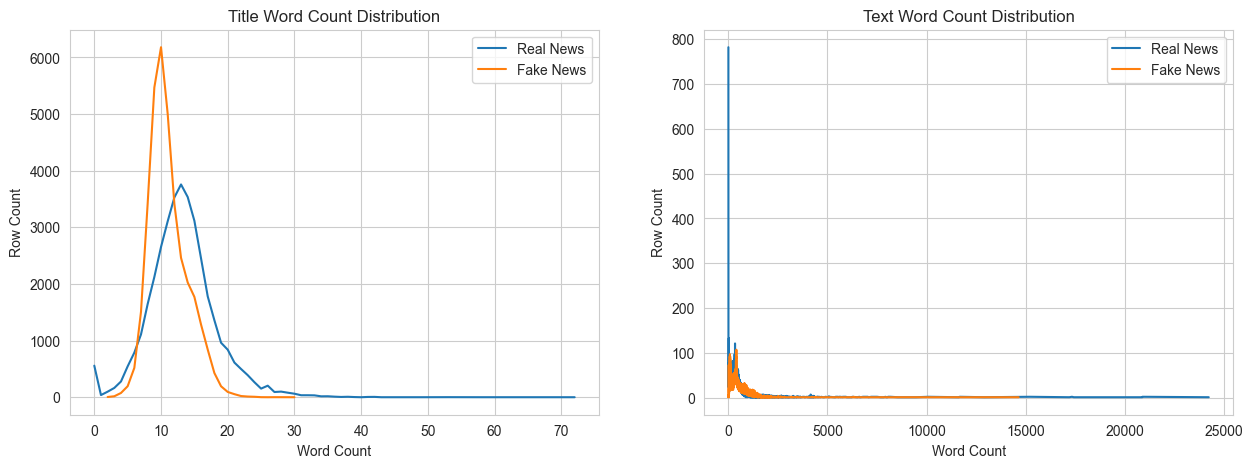

In [72]:
counted_fake_news = counted[counted['label'] == 0]
counted_real_news = counted[counted['label'] == 1]

fig, ax = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)
counted_real_news['title-word-count'].value_counts().sort_index().plot(label = 'Real News', ax = ax[0])
counted_fake_news['title-word-count'].value_counts().sort_index().plot(label = 'Fake News', ax = ax[0])
counted_real_news['text-word-count'].value_counts().sort_index().plot(label = 'Real News', ax = ax[1])
counted_fake_news['text-word-count'].value_counts().sort_index().plot(label = 'Fake News', ax = ax[1])
ax[0].set_title('Title Word Count Distribution')
ax[1].set_title('Text Word Count Distribution')
ax[0].set_xlabel('Word Count')
ax[1].set_xlabel('Word Count')
ax[0].set_ylabel('Row Count')
ax[1].set_ylabel('Row Count')
ax[0].legend()
ax[1].legend()
plt.show()

Можем да видим, че истинските новини могат да имат както много по-дълги заглавия, така и текстове. При заглавията, фалшивите новини имат по-голямо струпване в диапазона 10-13 думи. От друга страна, истинските новини имат доста текстове с много малко думи, което е учудващо, дори като вземем предвид празните текстове.

## Процент на думи само с главни букви

In [75]:
def percent_all_caps(x: str) -> float:
    words = x.split()
    if len(words) == 0: return 0

    count = 0
    for w in words:
        if w.isupper():
            count += 1
    return count / len(words)

caps = data.copy()
caps['title'] = caps['title'].fillna('')
caps['text'] = caps['text'].fillna('')
caps['title-all-caps'] = caps['title'].apply(percent_all_caps)
caps['text-all-caps'] = caps['text'].apply(percent_all_caps)
caps.describe()

,label,title-all-caps,text-all-caps
count,72134.000000,72134.000000,72134.000000
mean,0.514404,0.098272,0.021809
std,0.499796,0.160420,0.039535
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.007874
50%,1.000000,0.000000,0.014815
75%,1.000000,0.130435,0.025424
max,1.000000,1.000000,1.000000


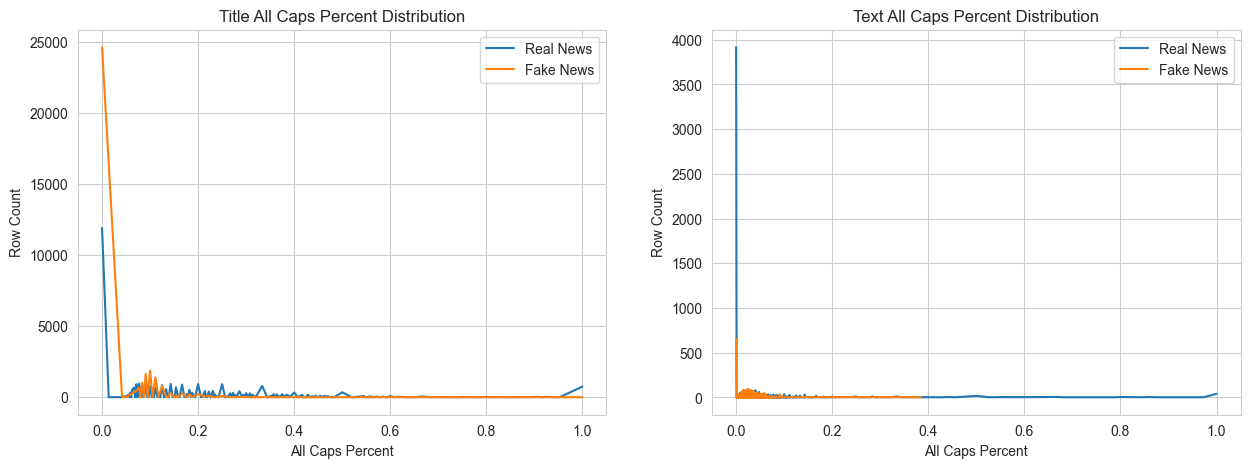

In [76]:
caps_fake_news = caps[caps['label'] == 0]
caps_real_news = caps[caps['label'] == 1]

fig, ax = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)
caps_real_news['title-all-caps'].value_counts().sort_index().plot(label = 'Real News', ax = ax[0])
caps_fake_news['title-all-caps'].value_counts().sort_index().plot(label = 'Fake News', ax = ax[0])
caps_real_news['text-all-caps'].value_counts().sort_index().plot(label = 'Real News', ax = ax[1])
caps_fake_news['text-all-caps'].value_counts().sort_index().plot(label = 'Fake News', ax = ax[1])
ax[0].set_title('Title All Caps Percent Distribution')
ax[1].set_title('Text All Caps Percent Distribution')
ax[0].set_xlabel('All Caps Percent')
ax[1].set_xlabel('All Caps Percent')
ax[0].set_ylabel('Row Count')
ax[1].set_ylabel('Row Count')
ax[0].legend()
ax[1].legend()
plt.show()

Тук дистрибутицята и на истинските, и на фалшивите новини е предвидима - или много малко думи или почти всички са изцяло с главни букви. Като че ли при заглавията, истинските новини по-често са с главни букви. Няма особени заключения, които да могат да се направят тук.

## Най-често срещани думи

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

fake_news = data[data['label'] == 0]

all_fake_text = ' '.join(text for text in fake_news['title'])

tfidf_vectorizer = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf_vectorizer.fit_transform([all_fake_text])

feature_names = tfidf_vectorizer.get_feature_names_out()

word_tfidf = zip(feature_names, tfidf_matrix.toarray()[0])

sorted_word_tfidf = sorted(word_tfidf, key=lambda x: x[1], reverse=True)

most_common_words = sorted_word_tfidf[:200] 


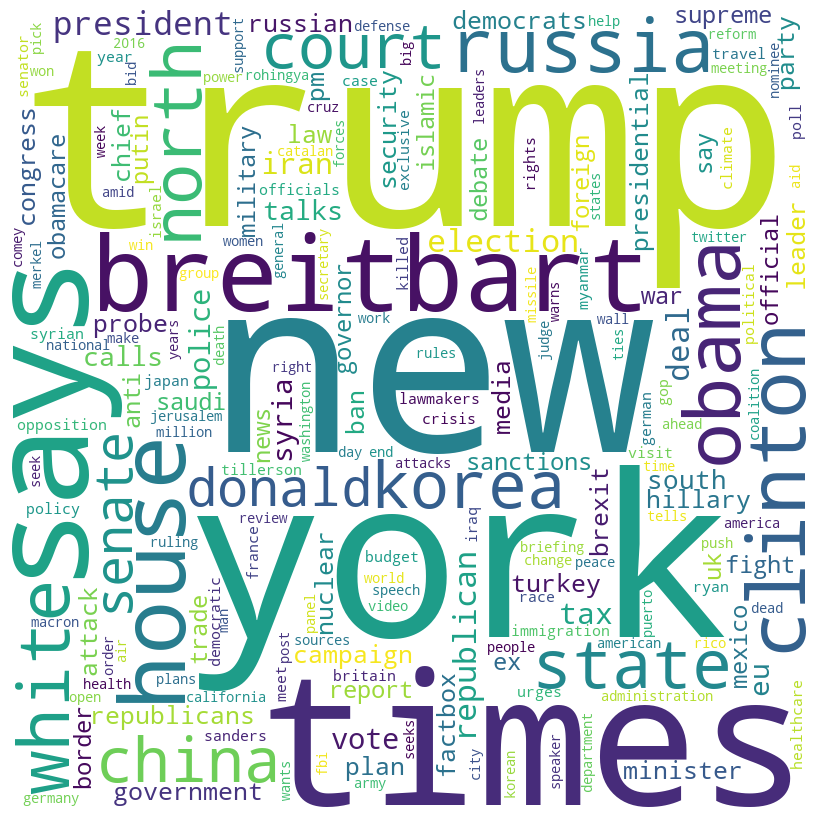

In [8]:
from wordcloud import WordCloud

word_freq_dict = dict(most_common_words)

def generate_wordcloud(word_freq_dict):
    wordcloud = WordCloud(width=800, height=800,
                          random_state=7, 
                          background_color='white', 
                          prefer_horizontal=0.5,
                          min_font_size=10).generate_from_frequencies(word_freq_dict)

    # Display the word cloud
    plt.figure(figsize=(8, 8), facecolor=None) 
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0) 
    plt.show()

generate_wordcloud(word_freq_dict)

### Тump и New York Times са най-често срещаните думи в заглавията заглавията на фалшивите новини ... случайност?!

П.П Не се получи ясна снимката на някои определени лица свързани с FAKE NEWS 😥

За сметка на това цвета на изображението не е случайно оранжево 😁

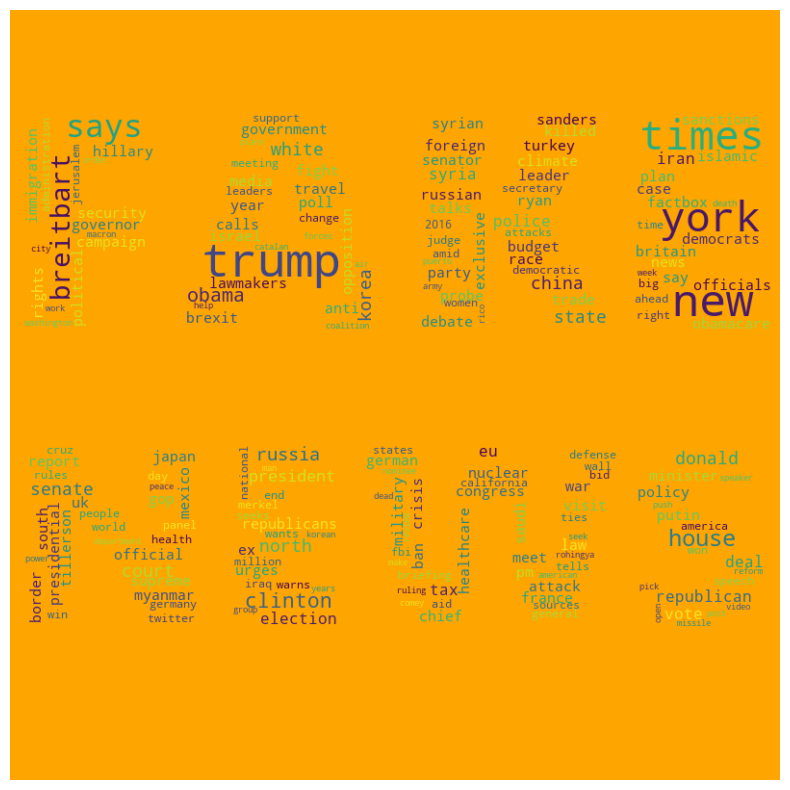

In [9]:
from PIL import Image
from wordcloud import WordCloud

def makeImage(text):
    mask = np.array(Image.open("./fake-news.jpg"))
    wc = WordCloud(
        random_state=7,
        background_color="orange",
        collocations=False, max_words= 1000, mask=mask,
        )
    wc.generate_from_frequencies(text)

    plt.figure(figsize=(10,10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()


word_freq_dict = dict(most_common_words)
makeImage(word_freq_dict)

## Трениране

In [10]:
X = data.drop('label', axis=1) 
y = data['label']

In [11]:
X.head()

,title,text
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...
1,NaN,Did they post their votes for Hillary already?
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ..."
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will..."


In [12]:
y.size

72134

In [13]:
X.head()

,title,text
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...
1,NaN,Did they post their votes for Hillary already?
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ..."
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will..."


До сега имахме само 3 колони. Нека сега да ги комбинираме в една отделна колона, която да съдържа целия текст от заглавията и от новината. 

In [14]:
data['combined_text'] = data['title'].fillna('') + " " + data['text'].fillna('')
data.head()

,title,text,label,combined_text
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,NaN,Did they post their votes for Hillary already?,1,Did they post their votes for Hillary already?
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...


Сега нека да пробване да изчистим текста от ненужни думи и да го запишем с малки букви в нова колона.

In [15]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def preprocess_text(text):

    text = text.lower()

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(processed_tokens)

data['processed_text'] = data['combined_text'].apply(preprocess_text)

data.head()

,title,text,label,combined_text,processed_text
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,law enforcement high alert following threat co...
1,NaN,Did they post their votes for Hillary already?,1,Did they post their votes for Hillary already?,post vote hillary already
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,unbelievable obama attorney general say charlo...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri...",bobby jindal raised hindu us story christian c...
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...,satan russia unvelis image terrifying new supe...


Нека да си подготвим няколко функции, които ще ни се налага да използваме често. (Мързи ме да ги пиша няколко пъти 😁)    

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

def create_vectorizer(vectorize_type = 'tfidf', max_df = 0.7):
    if vectorize_type == 'tfidf':
        vectorizer = TfidfVectorizer(stop_words='english', max_df=max_df)
    elif vectorize_type == 'count':
        vectorizer = CountVectorizer(stop_words='english', max_df=max_df)
    else:
        raise ValueError('Invalid vectorizer type')
    return vectorizer

In [17]:
def vectorize_data(vectorizer):
    X = vectorizer.fit_transform(data['combined_text'])
    return X

In [18]:
from sklearn.model_selection import train_test_split

def split_data(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

In [19]:
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

In [20]:
def score_model(model, X_test, y_test):
    return model.score(X_test, y_test)

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

def display_confusion_matrix(y_true, y_pred, display_labels=[True, False]):

    confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, 
                                                display_labels=display_labels)
    cm_display.plot()
    plt.show()    


In [22]:
def plot_classification_report(y_true, y_pred):
    class_names = ['Fake', 'Real']
    report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    report_df = pd.DataFrame(report).transpose()

    report_df = report_df.drop('support', axis=1).iloc[:-3]

    sns.set_style("whitegrid")
    report_df.plot(kind='bar', figsize=(10, 6))
    plt.title('Classification Report')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.show()

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(model, X_test, y_test):

    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [36]:
def predict_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    plot_roc_curve(model, X_test, y_test)
    print("\nConfusion Matrix:\n")
    display_confusion_matrix(y_test, y_pred)
    plot_classification_report(y_test, y_pred)

In [24]:
def model_result(model, X_train, y_train, X_test, y_test):
    print("Train score: ",  score_model(model, X_train, y_train))

    print("Test score: ",  score_model(model, X_test, y_test))

    predict_model(model, X_test, y_test)

In [25]:
from sklearn.model_selection import GridSearchCV

C_values = [0.01, 0.1, 1, 10, 100, 1000]
def regularization_strength(model, X_train, y_train):
    grid_search = GridSearchCV(model, {'C': C_values}, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    return best_model


## Какво още ни остава за да направим?
### Тогава пускаме алгоритмите в действие

<div style="background-color: #1c4f38; padding: 10px;">
    <h2 style="color: white">Линейна регресия</h2>
    <p style="color: white">Нека да започнем с един от най-простите алгоритми - линейната регресия. Тя е базирана на линейна функция, която се опитва да предвиди стойността на атрибутите, като се опитва да намери най-добрите коефициенти пред тях. Тъй като това е задача за класификация, ще използваме логистична регресия, която е адаптирана за дискретни стойности.</p>
</div>

Тест първи - сурови данни без предварителна обработка (просто съчетаване на заглавие и текст). <br>
Ако не стане от първия път - по-скоро да се откажем? 😄

In [28]:
X_vectorized = create_vectorizer().fit_transform(data['combined_text'])
X_train, X_test, y_train, y_test = split_data(X_vectorized, y)

In [29]:
from sklearn.linear_model import LogisticRegression

best_model_regression_tfidf = regularization_strength(model=LogisticRegression(max_iter=1000), X_train=X_train, y_train=y_train)

Train score:  0.9980591609336822
Test score:  0.9627781243501767


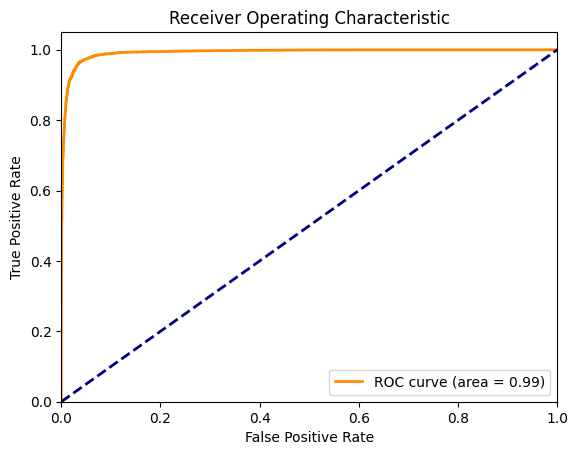


Confusion Matrix:



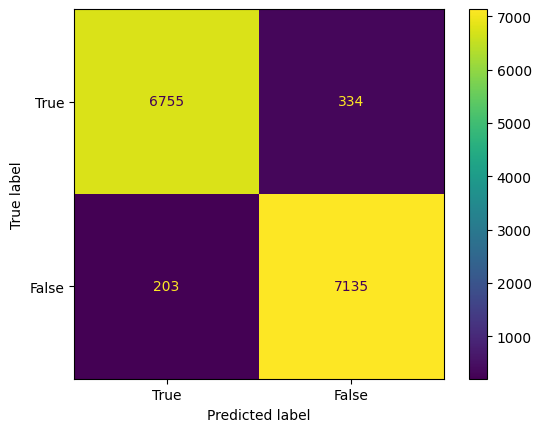

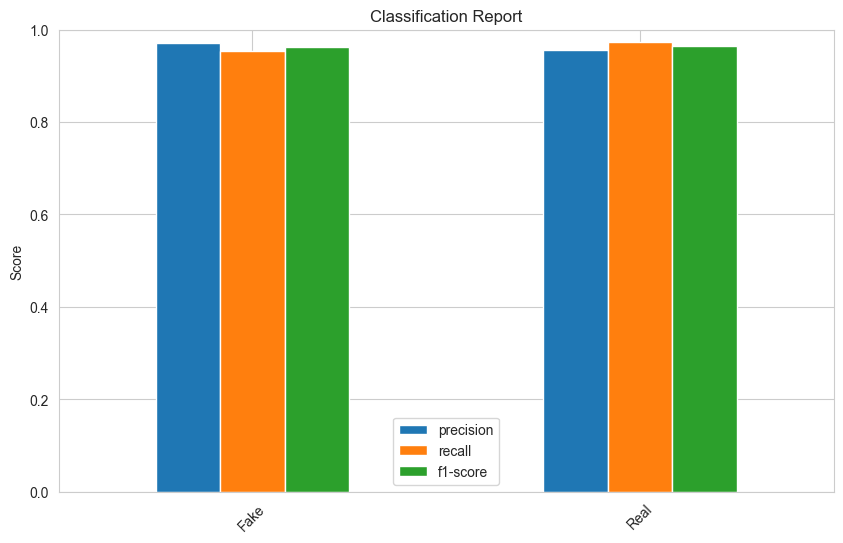

In [30]:
model_result(best_model_regression_tfidf, X_train, y_train, X_test, y_test)

Нека да сменим TfidfVectorizer с CountVectorizer и да видим какво ще стане.

In [31]:
X_vectorized_count = create_vectorizer( vectorize_type='count').fit_transform(data['combined_text'])

X_train, X_test, y_train, y_test = split_data(X_vectorized_count, y)

In [32]:
best_model_regression_count = regularization_strength(model=LogisticRegression(max_iter=1000), X_train=X_train, y_train=y_train)

Train score:  0.9955291385793751
Test score:  0.9589658279614611


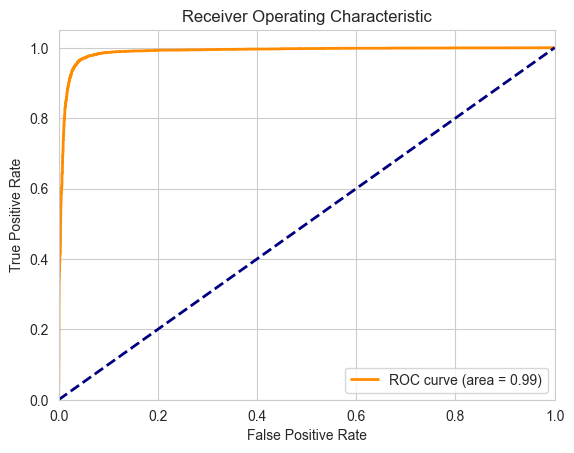


Confusion Matrix:



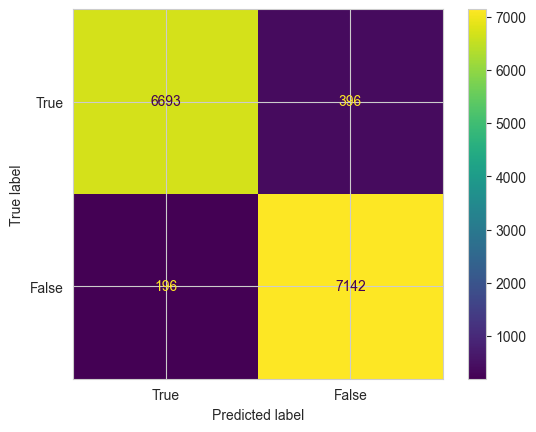

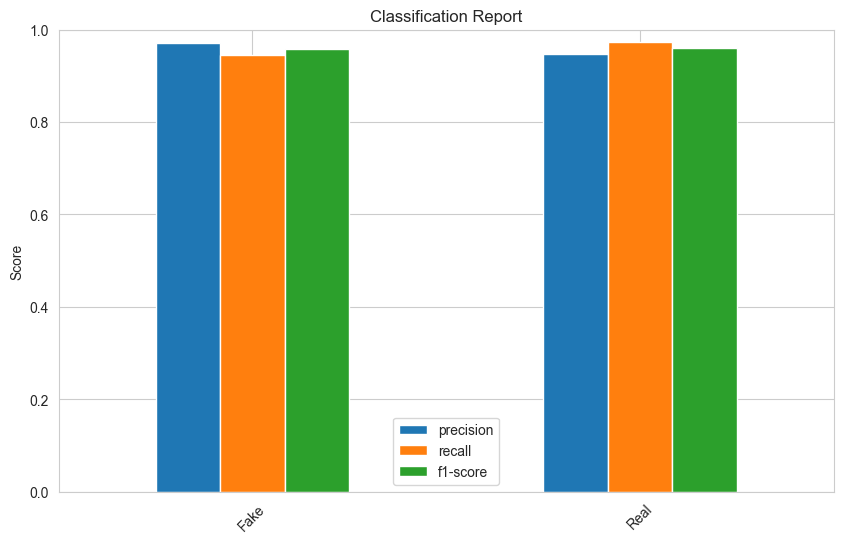

In [33]:
model_result(best_model_regression_count, X_train, y_train, X_test, y_test)

Добре а сега с вече подготвената информация да пробваме да тренираме модела.

In [34]:
X_vectorized = create_vectorizer().fit_transform(data['processed_text'])
X_train, X_test, y_train, y_test = split_data(X_vectorized, y)

In [35]:
logistic_regression_tfidf_proceed_data = LogisticRegression(C = 100, max_iter=1000)

logistic_regression_tfidf_proceed_data.fit(X_train, y_train)

LogisticRegression(C=100, max_iter=1000)

Train score:  0.999168211828721
Test score:  0.9599362306785888


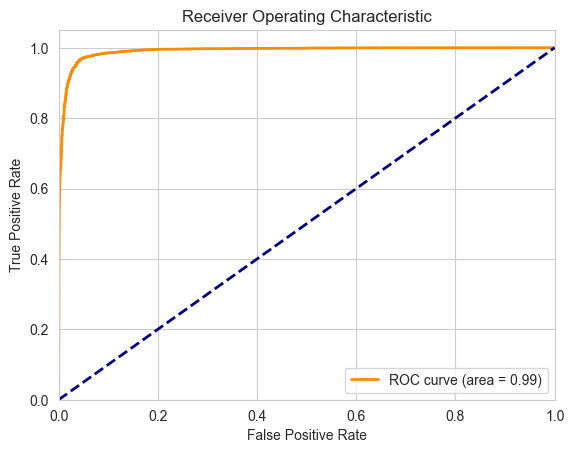


Confusion Matrix:



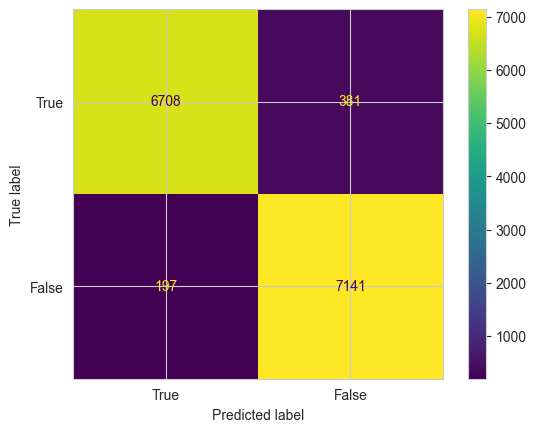

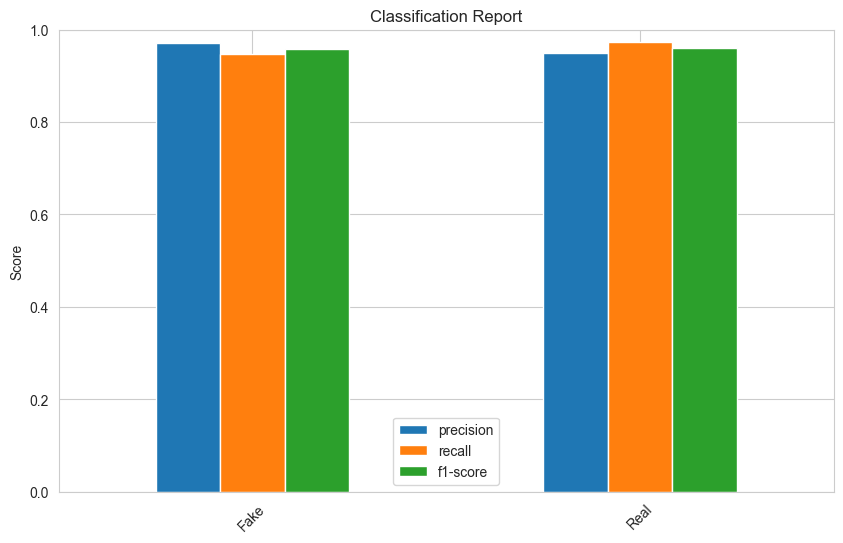

In [36]:
model_result(logistic_regression_tfidf_proceed_data, X_train, y_train, X_test, y_test)

<div style="background-color: #1c4f38; padding: 10px;">
    <h1 style="color: white">KNN</h1>
    <p style="color: white">Алгоритъма работи на базата, че подобни случаи са близко един до друг в пространството. Подходящ е за по малки набори от данни, защото е доста бавен алгоритъм </p>
</div>

In [26]:
X = data['processed_text']
y = data['label']
X_train, X_test, y_train, y_test = split_data(X, y)

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MaxAbsScaler

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),                  
    ('scaler', MaxAbsScaler ()),                    
    ('knn', KNeighborsClassifier(n_neighbors=5, leaf_size=10))   
])

In [31]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('scaler', MaxAbsScaler()),
                ('knn', KNeighborsClassifier(leaf_size=10))])

In [32]:
model_result(pipeline, X_train, y_train, X_test, y_test)

Train score:  0.538929419307883


<div style="background-color: #1c4f38; padding: 10px;">
    <h1 style="color: white">DecisionTree</h1>
    <p style="color: white">Алгоритъма изгражда модел в формата на дърво, който разделя данните на все по-малки подгрупи, базирайки се на различни характеристики, като във всяко „разклонение“ на дървото се взима решение за стойността на един фичър, водещо до прогноза в крайните „листа“ на дървото. </p>
</div>

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),                  
    ('decision_tree', DecisionTreeClassifier())    
])

param_grid = {
    'decision_tree__max_depth': [10, 20, 30, None],
    'decision_tree__min_samples_split': [2, 5, 10],
    'decision_tree__min_samples_leaf': [1, 2, 4]
}

In [56]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('decision_tree',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'decision_tree__max_depth': [10, 20, 30, None],
                         'decision_tree__min_samples_leaf': [1, 2, 4],
                         'decision_tree__min_samples_split': [2, 5, 10]},
             verbose=1)

Train score:  0.9736600412428301
Test score:  0.9385180564219866


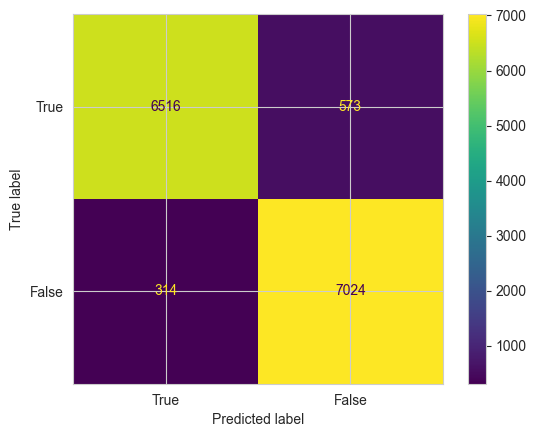

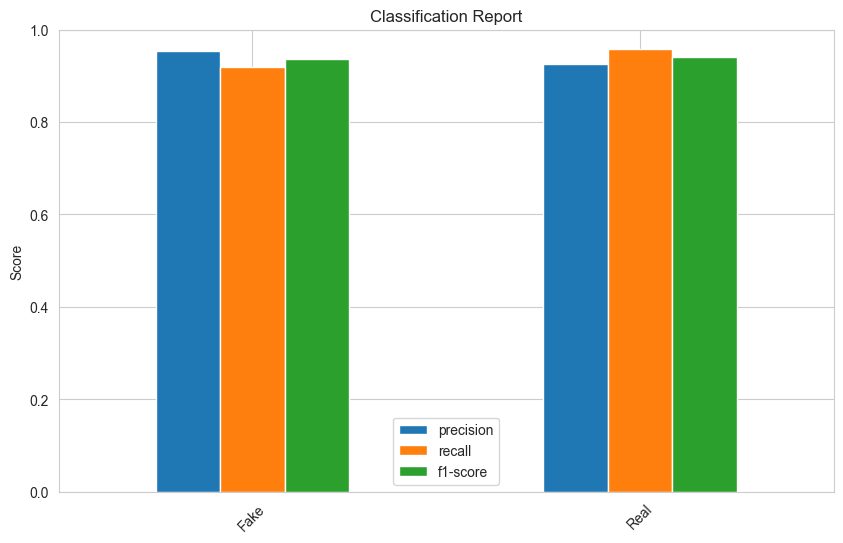

In [57]:
y_pred = grid_search.predict(X_test)    
print("Train score: ",  score_model(grid_search, X_train, y_train))

print("Test score: ",  score_model(grid_search, X_test, y_test))
display_confusion_matrix(y_test, y_pred)
plot_classification_report(y_test, y_pred)

<div style="background-color: #1c4f38; padding: 10px;">
    <h1 style="color: white">RandomForest</h1>
    <p style="color: white">Random Forest тренира няколко Decision Trees върху подмножества от данните и използва средни стойности, за подобряване на точността и избягване на overfitting. Използваме GridSearchCV, за да тестваме няколко стойности за тренировачните параметри. Позлваме -1 за стойност на n_jobs, за да се изпълнява алгоритъмът максимално паралелно.

</p>
</div>

In [45]:
from sklearn.ensemble import RandomForestClassifier

X_vectorized = create_vectorizer().fit_transform(data['processed_text'])
search = GridSearchCV(RandomForestClassifier(), {'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 3, 5], 'n_jobs': [-1]})
search.fit(X_vectorized, y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 3, 5],
                         'n_jobs': [-1]})

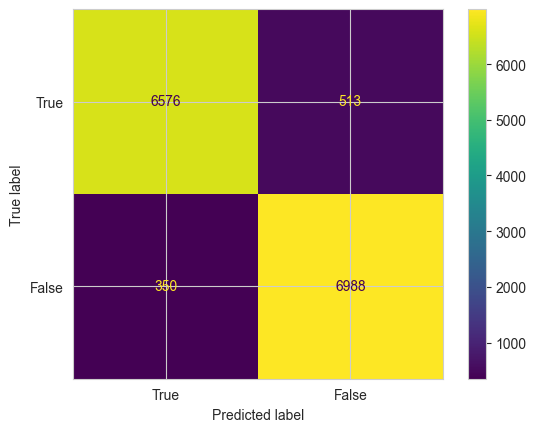

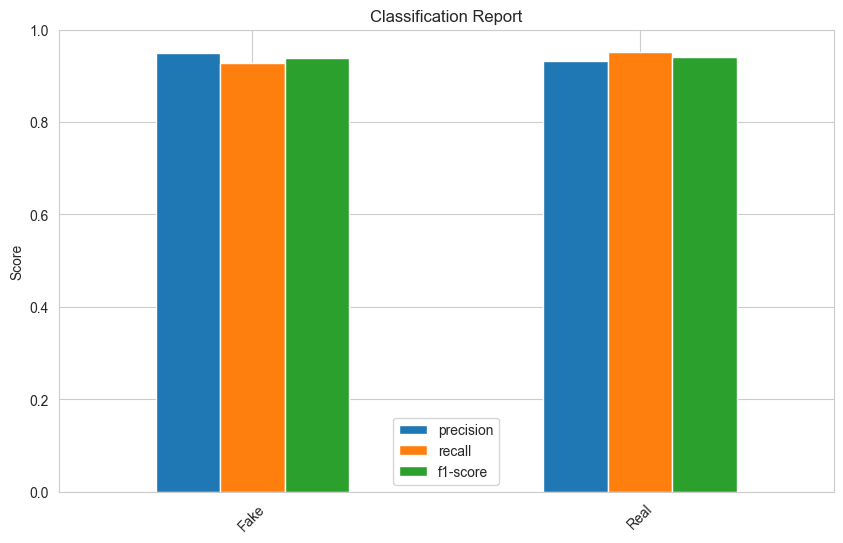

In [46]:
y_pred = pipeline.predict(X_test)
display_confusion_matrix(y_test, y_pred)
plot_classification_report(y_test, y_pred)

{'max_depth': 7, 'min_samples_leaf': 3, 'n_jobs': -1}
0.82356454377835


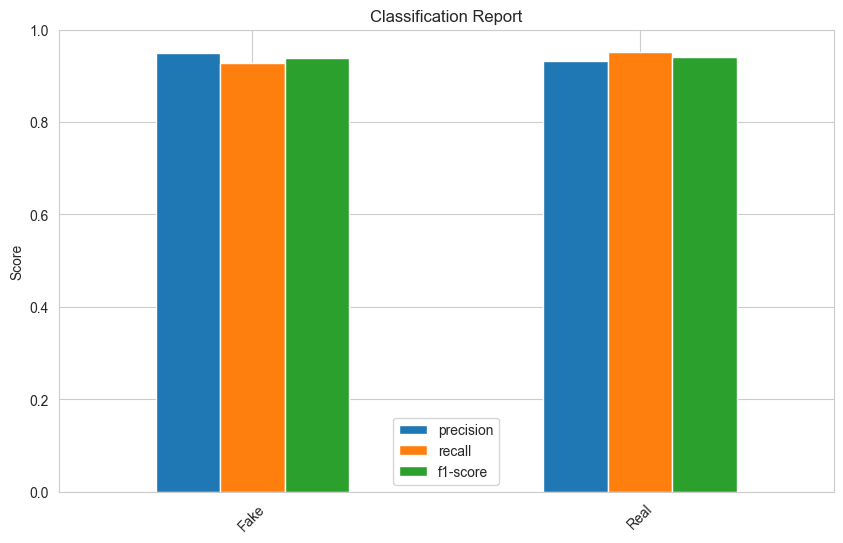

In [43]:
print(search.best_params_)
print(search.best_score_)
plot_classification_report(y_test, y_pred)

<div style="background-color: #1c4f38; padding: 10px;">
    <h1 style="color: white">Последен, но не и по точност (може би) ни остана Naive Bayes</h1>
    <p style="color: white">Naive Bayes е надежден заради своята способност да се справя добре с n-мерни данни, сравнително прост и доста бърз при трениране и прогнозиране на данни.</p>
</div>

In [66]:
from sklearn.naive_bayes import MultinomialNB 
X_vectorized_count = create_vectorizer( vectorize_type='count').fit_transform(data['combined_text'])

X_train, X_test, y_train, y_test = split_data(X_vectorized_count, y)

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]} 
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, n_jobs=-1)

In [67]:
nb = grid_search.fit(X_train, y_train)

Train score:  0.9400419359869686
Test score:  0.9084355721910307


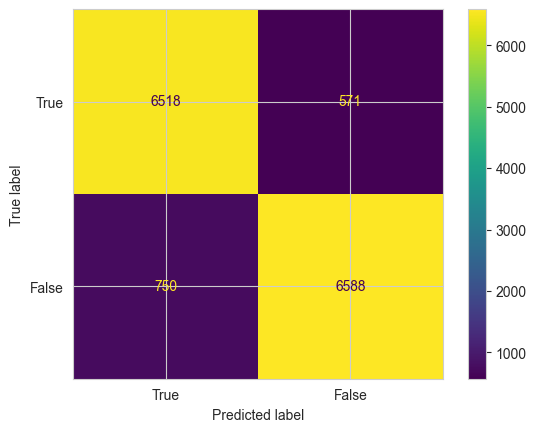

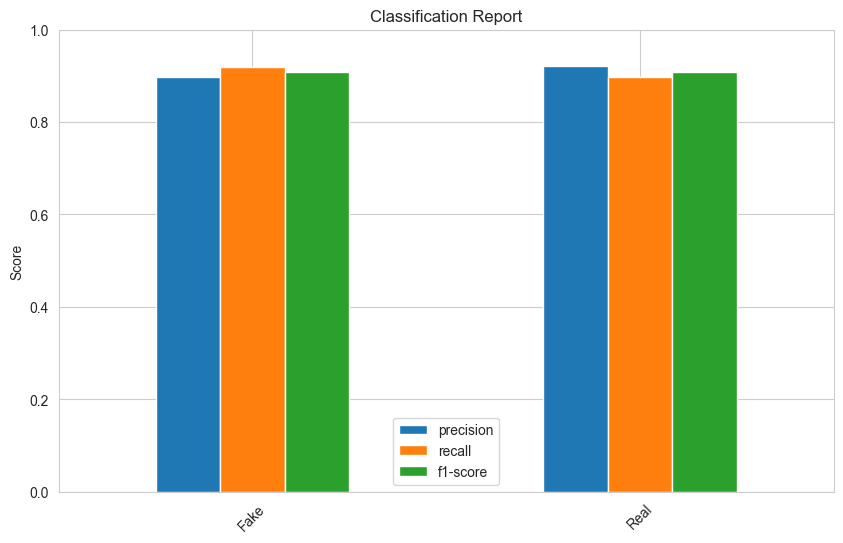

In [68]:
y_pred = nb.predict(X_test)
print("Train score: ",  score_model(nb, X_train, y_train))
print("Test score: ",  score_model(nb, X_test, y_test))
display_confusion_matrix(y_test, y_pred)
plot_classification_report(y_test, y_pred)

# Заключение


Безспорно Линейната регресия показа по-добри резултати, сравнение с останалите използвани алгоритми.

При това се оказа, че най-добрите резултати се получават при използване на TfidfVectorizer и когато са премахнати стоп думите.

KNN, DecisionTree и RandomForest се оказаха много бавни и се нуждаят от много време и ram памет за трениране и като цяло са неефикасни.

# Източници

[kaggle dataset](https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification/data)

[Допълнителни характеристики от github хранилището](https://github.com/melaniab/ml_course/blob/master/lectures_2023/13-text-processing.ipynb)

[Development of Fake News Model Using Machine 
Learning through Natural Language Processing ](https://arxiv.org/ftp/arxiv/papers/2201/2201.07489.pdf)

[Confusion matrix](https://www.w3schools.com/python/python_ml_confusion_matrix.asp)

[Roc curve](https://afioto.medium.com/classification-visualizations-with-yellowbrick-d6f6150d7a32)

[Masked word cloud](https://amueller.github.io/word_cloud/auto_examples/masked.html)

### Можете да разгледате нашето Github хранилище на проекта [тук](https://github.com/kirilyotov/ML-Fake_News/tree/master?tab=readme-ov-file)